In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
#Import data
df = pd.read_csv('arrhythmia.data', header=None)
df = df.iloc[:, 0:4]
df.columns = ['Age', 'Sex', 'Height', 'Weight']
df = df.dropna()
df.head()


,Age,Sex,Height,Weight
0,75,0,190,80
1,56,1,165,64
2,54,0,172,95
3,55,0,175,94
4,75,0,190,80


In [50]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Splitting the data set 
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Weight']], df[['Sex']], test_size=0.33, random_state=0)

#Normalizing the training and testing data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

K = range(2, 10)
fits = []
sse_score = []
silhouette_scores = []

for k in K:
    # train model
    model = KMeans(n_clusters = 4, random_state = 0, n_init=10).fit(X_train)
    #Calculate SSE
    sse = model.inertia_
    sse_score.append(sse)

    #Calculate silhouette score
    silhouette = silhouette_score(X_train_norm, model.labels_, metric='euclidean')
    silhouette_scores.append(silhouette)
    
    #append model to fits
    fits.append(model)

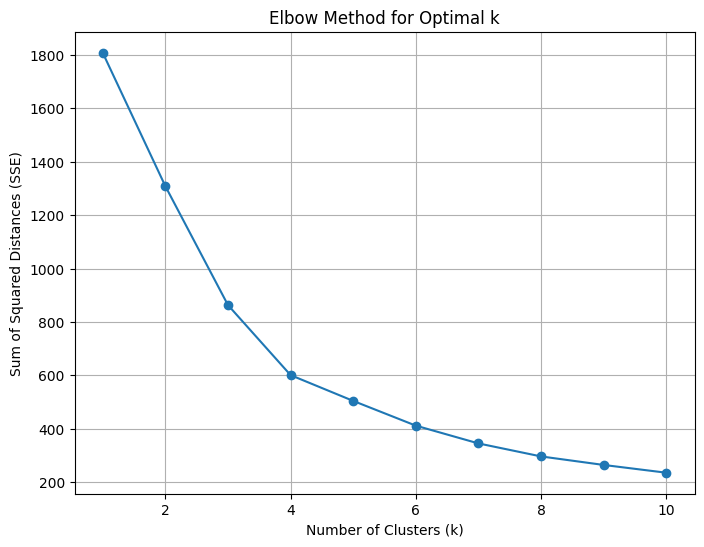

In [51]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()

Elbow plot helps to identify optimal number of clusters (k) by looking at elbow point where the rate of decrease for Sum of Squared Distances slows down. In this plot it would be k=3.

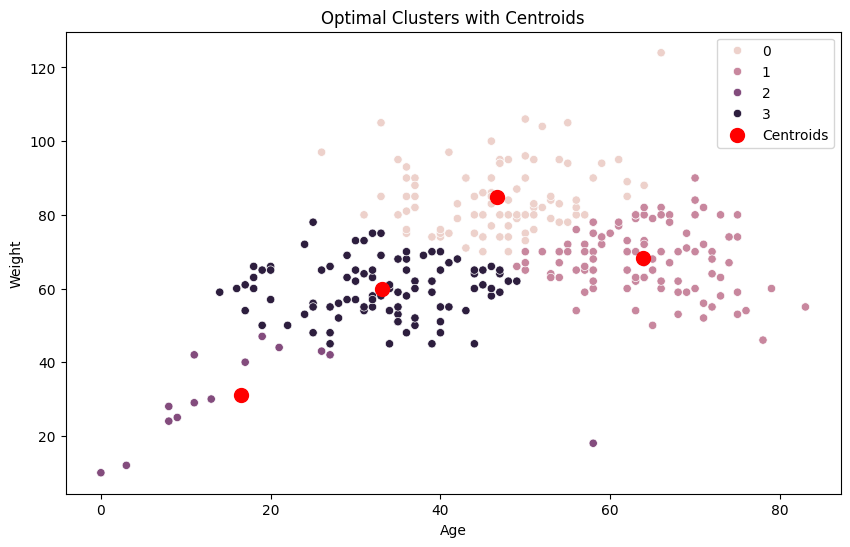

In [52]:
#Plot clusters with centroids
plt.figure(figsize=(10, 6))
centroids = fits[2].cluster_centers_
sns.scatterplot(data = X_train, x = 'Age', y = 'Weight', hue = fits[2].labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], color= 'red',label= 'Centroids', s=100)
plt.title('Optimal Clusters with Centroids')
plt.legend()
plt.show()

This plot shows optimal clusters (determined in previous plot) and their centroids. Data for each cluster is organized by color.